In [9]:
import os, sys
# point Python to the folder where problem1a.py etc. actually live
module_dir = r"C:\Users\prana\Downloads\CS663\Assignment1\Question3"
if module_dir not in sys.path:
    sys.path.insert(0, module_dir)
os.chdir(module_dir)  # optional but keeps relative paths consistent

Part (a) - Linear Contrast Stretching


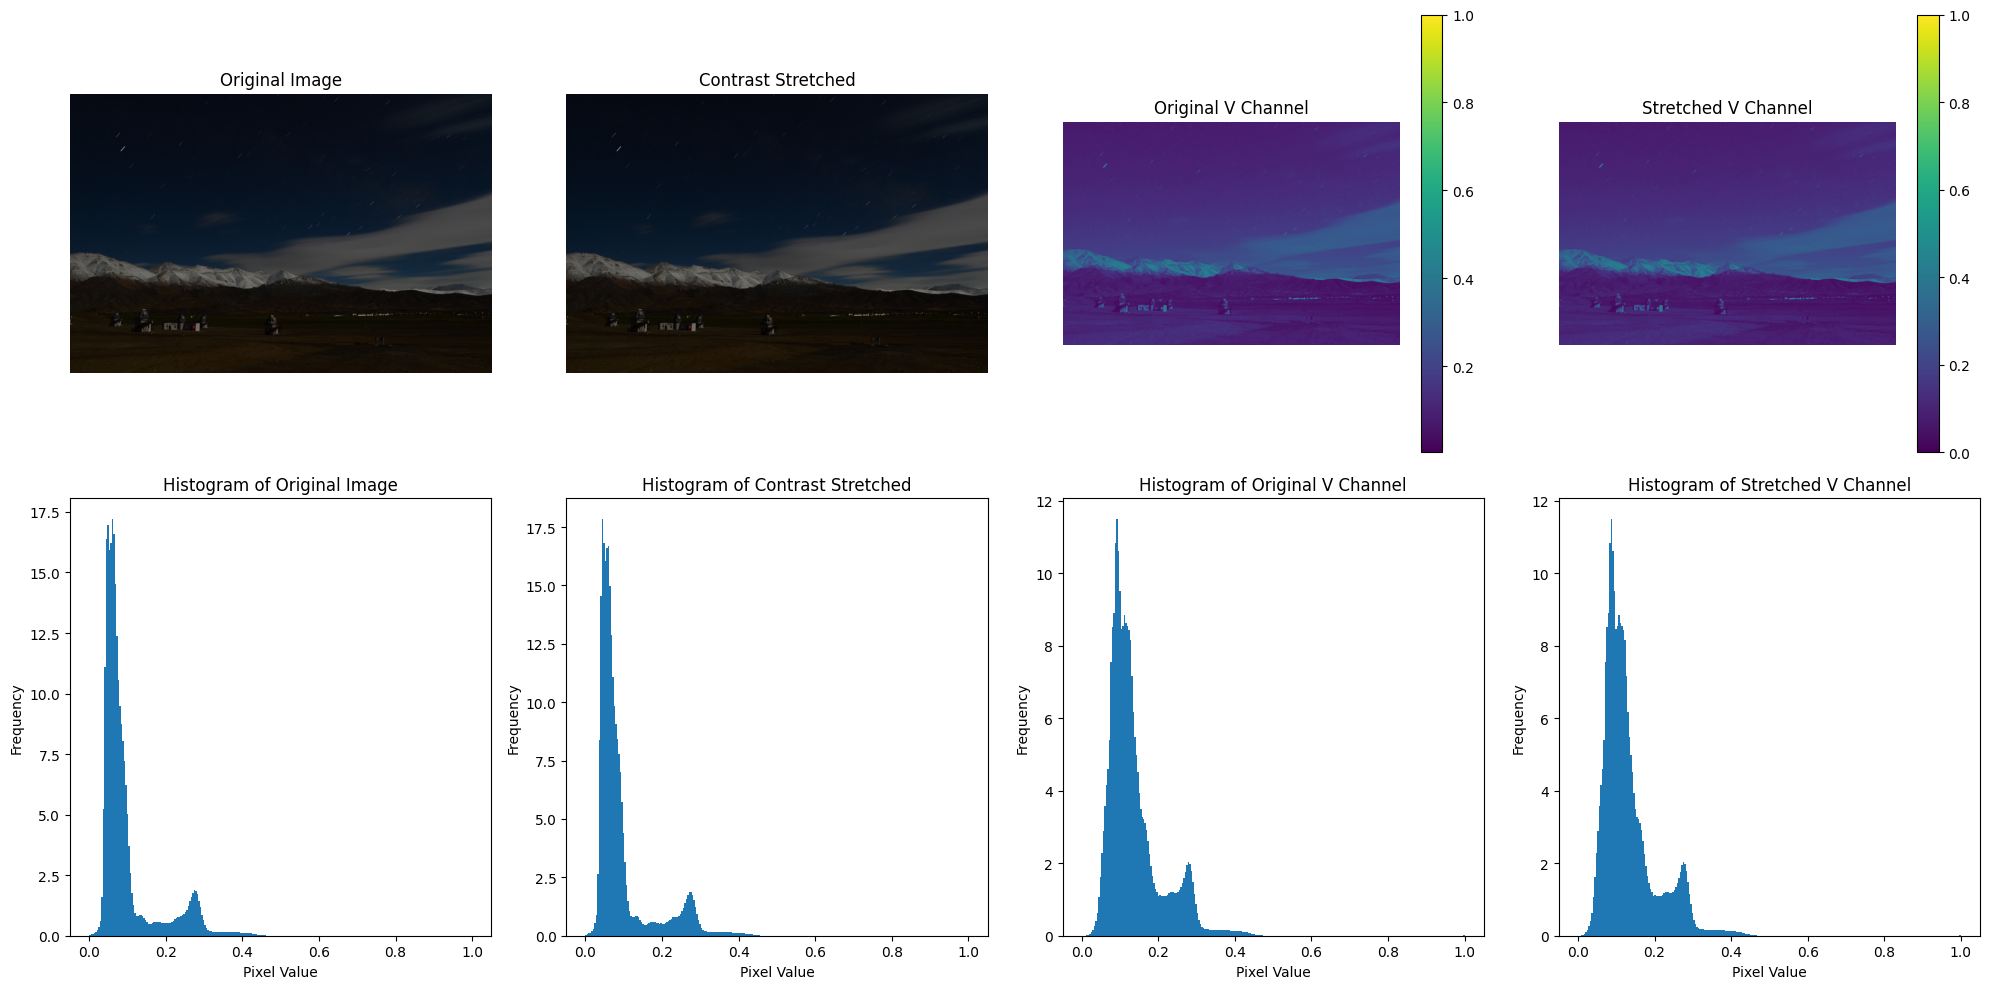

Part (b) - Histogram Equalization


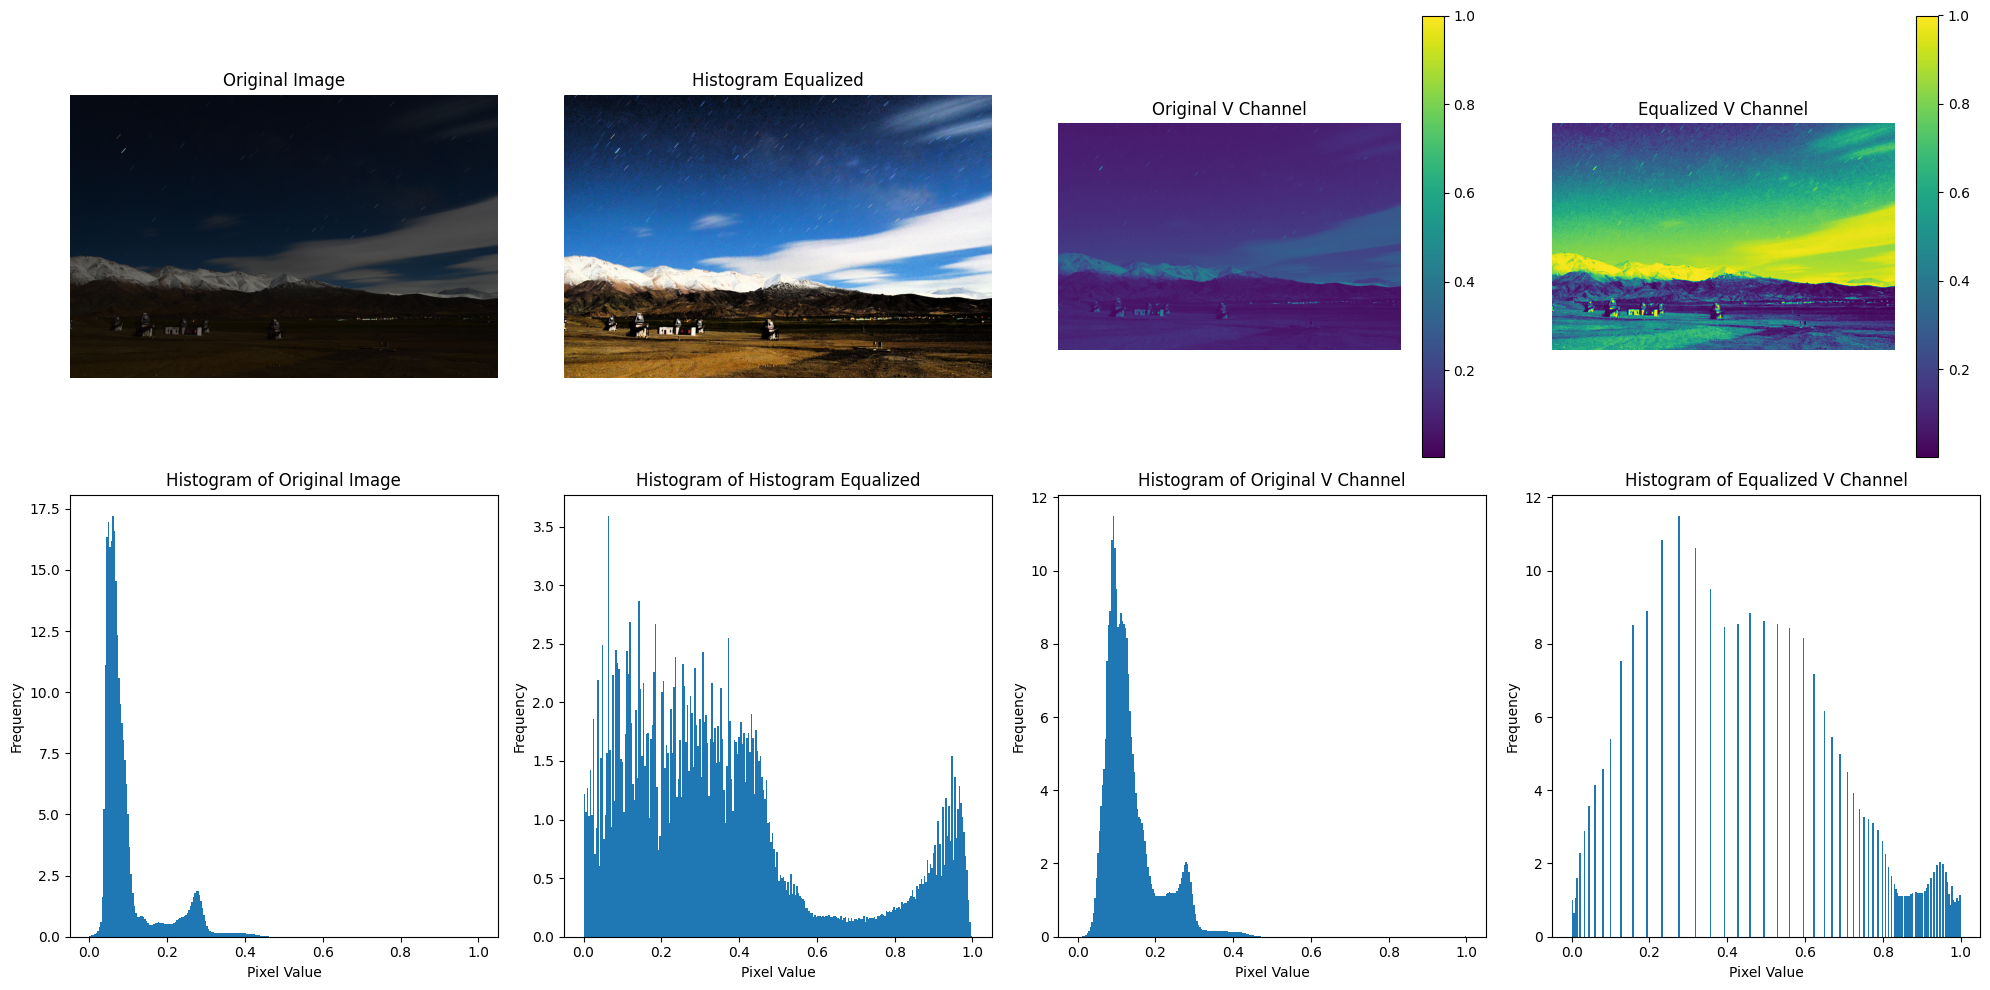

Part (c) - CLAHE


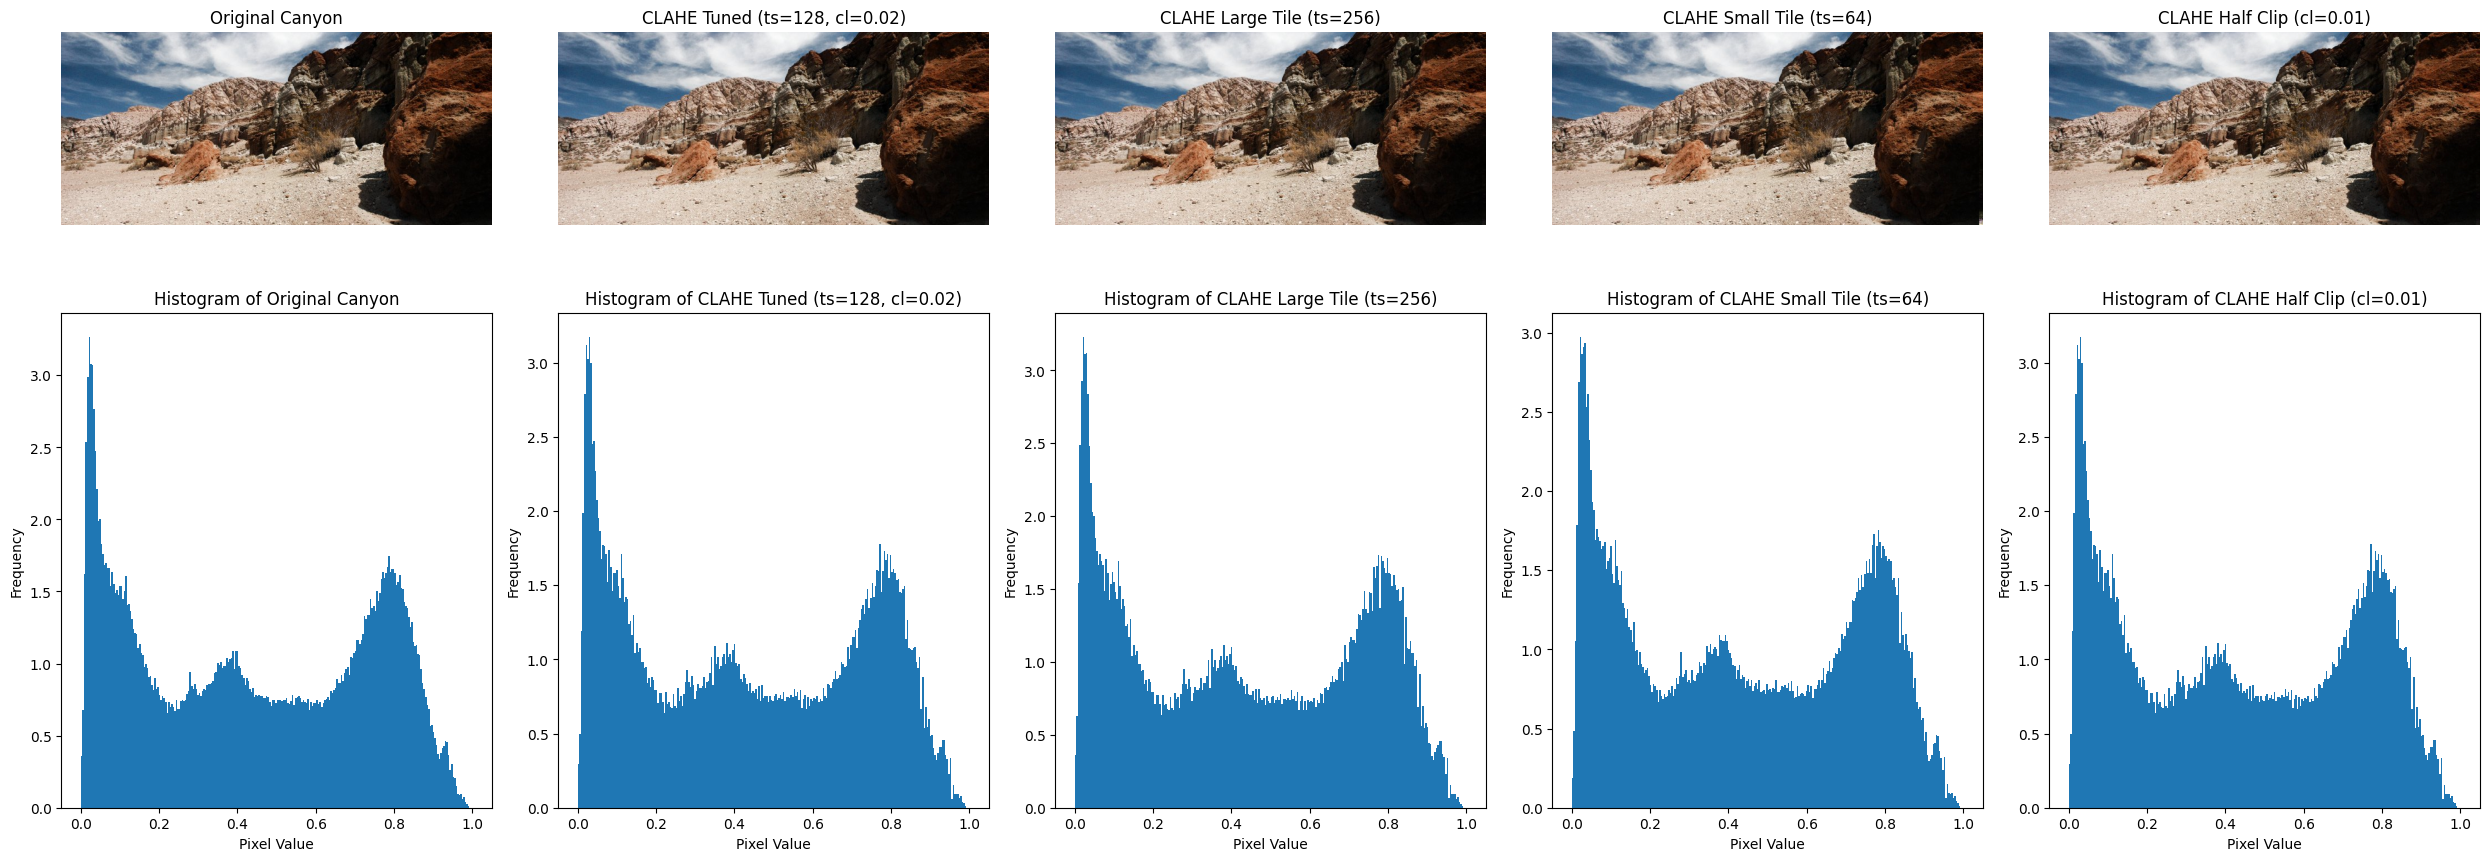

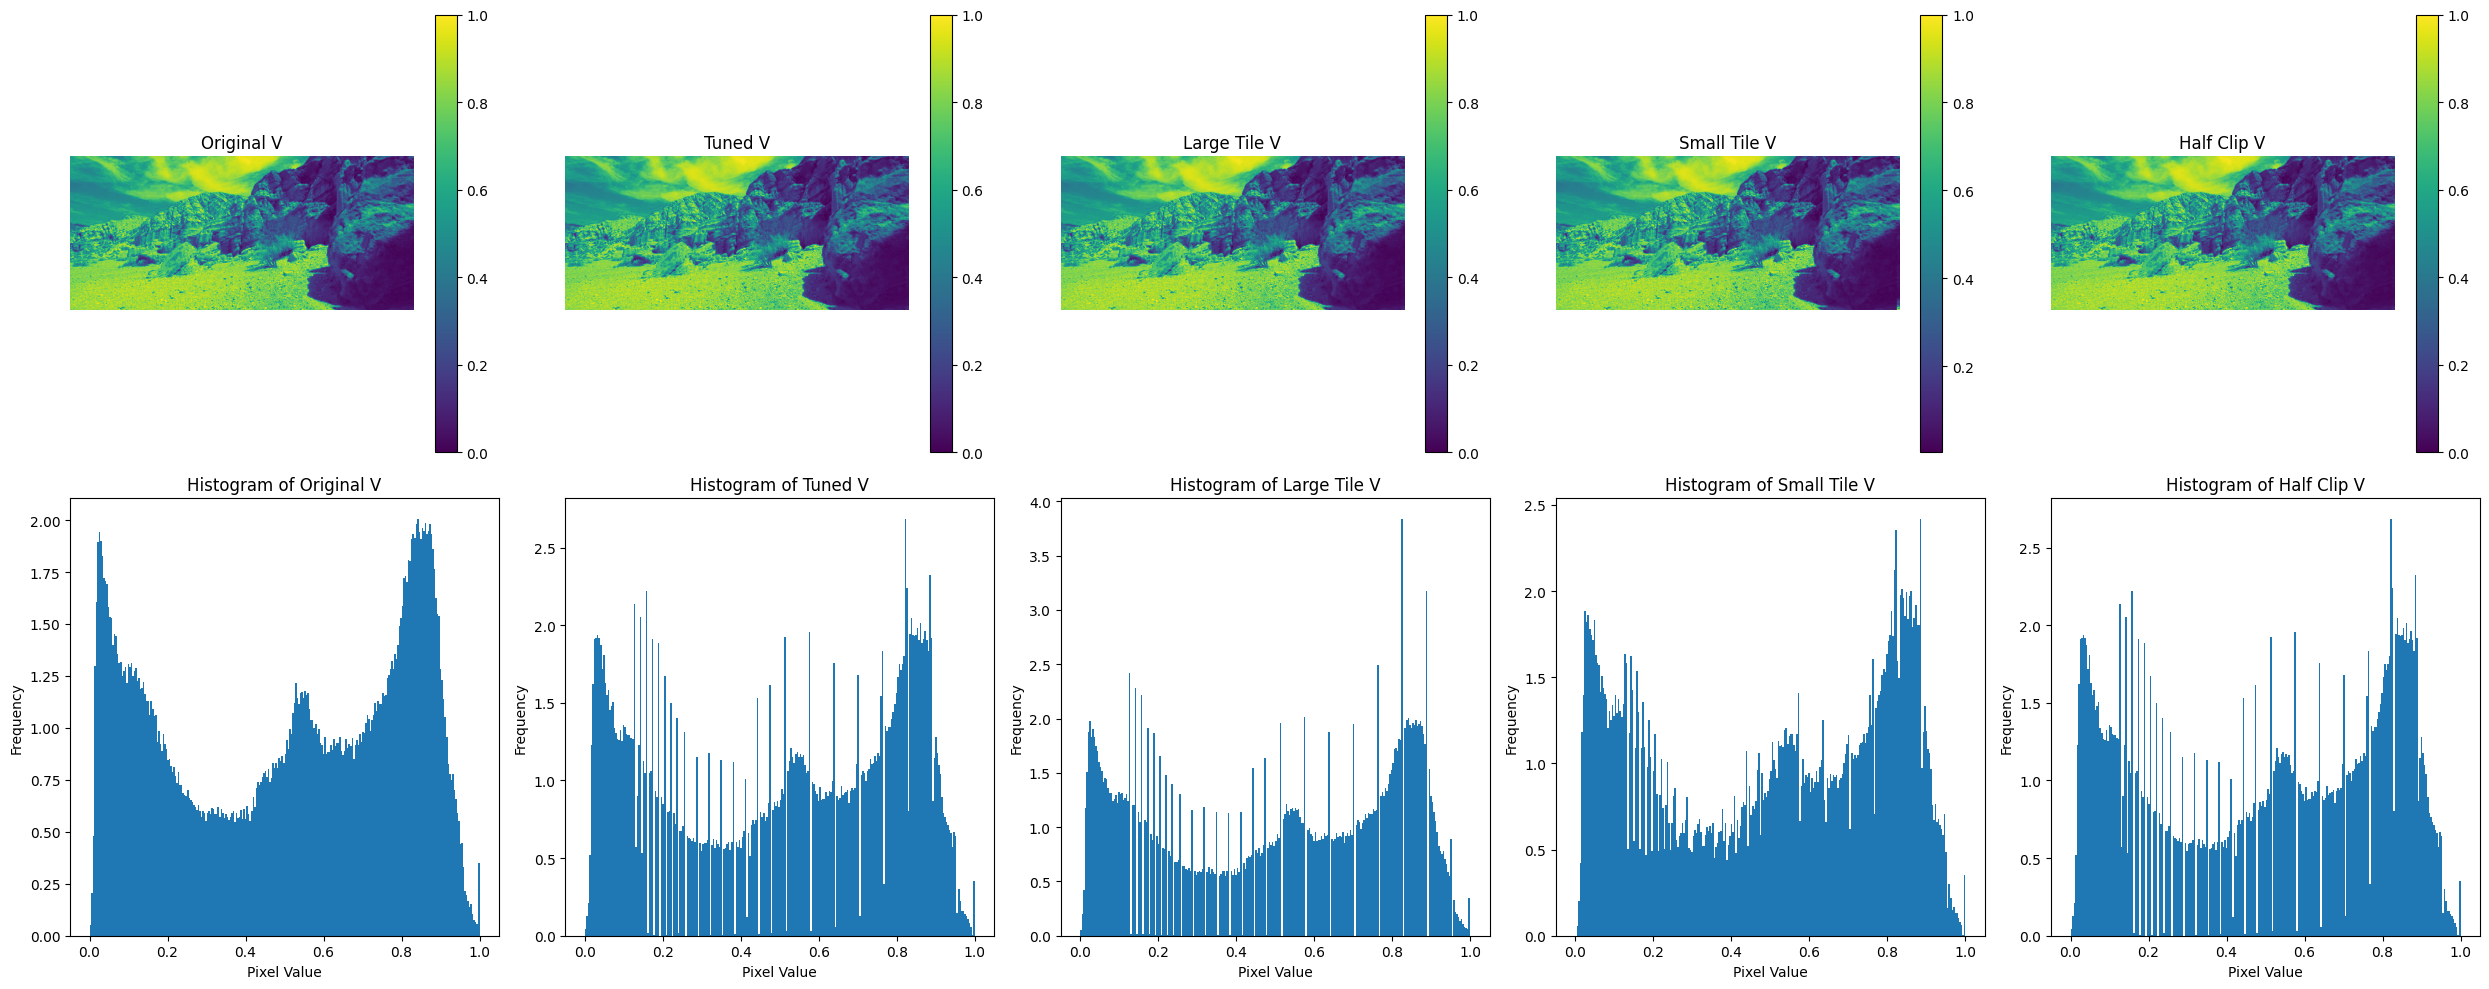

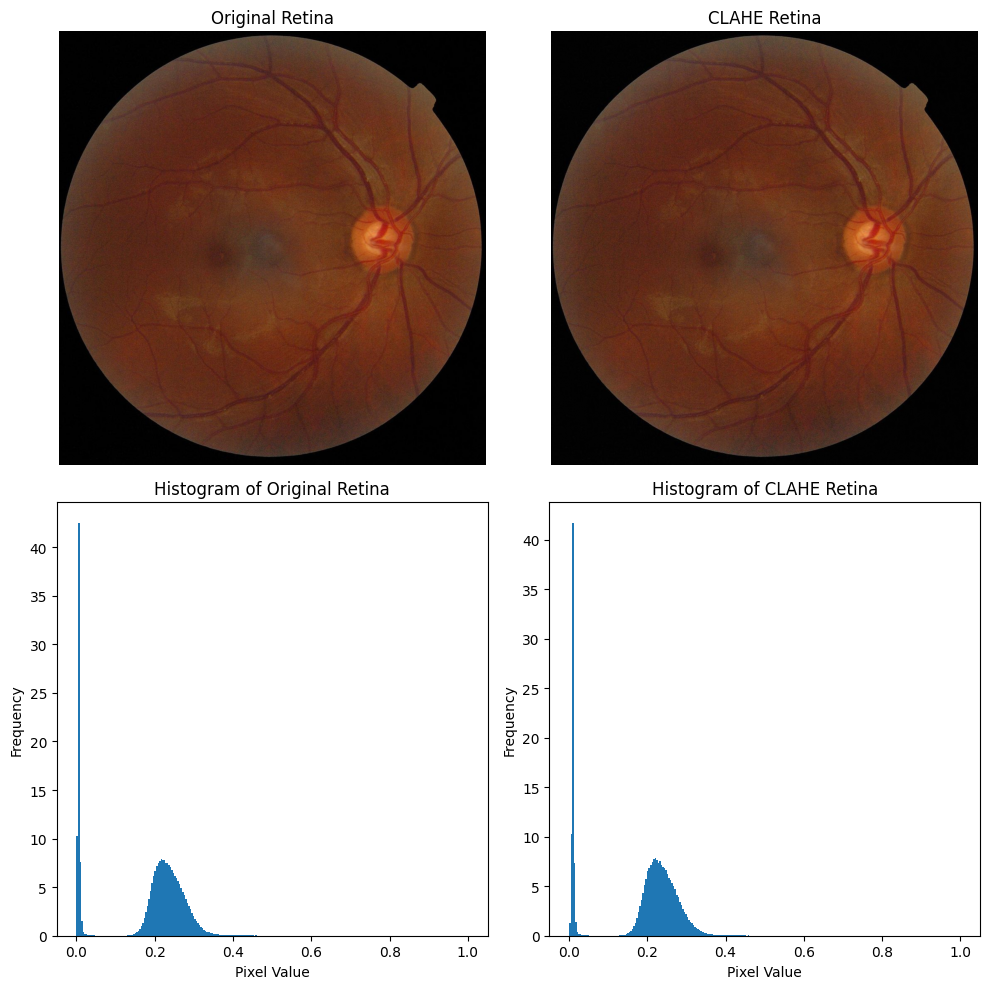

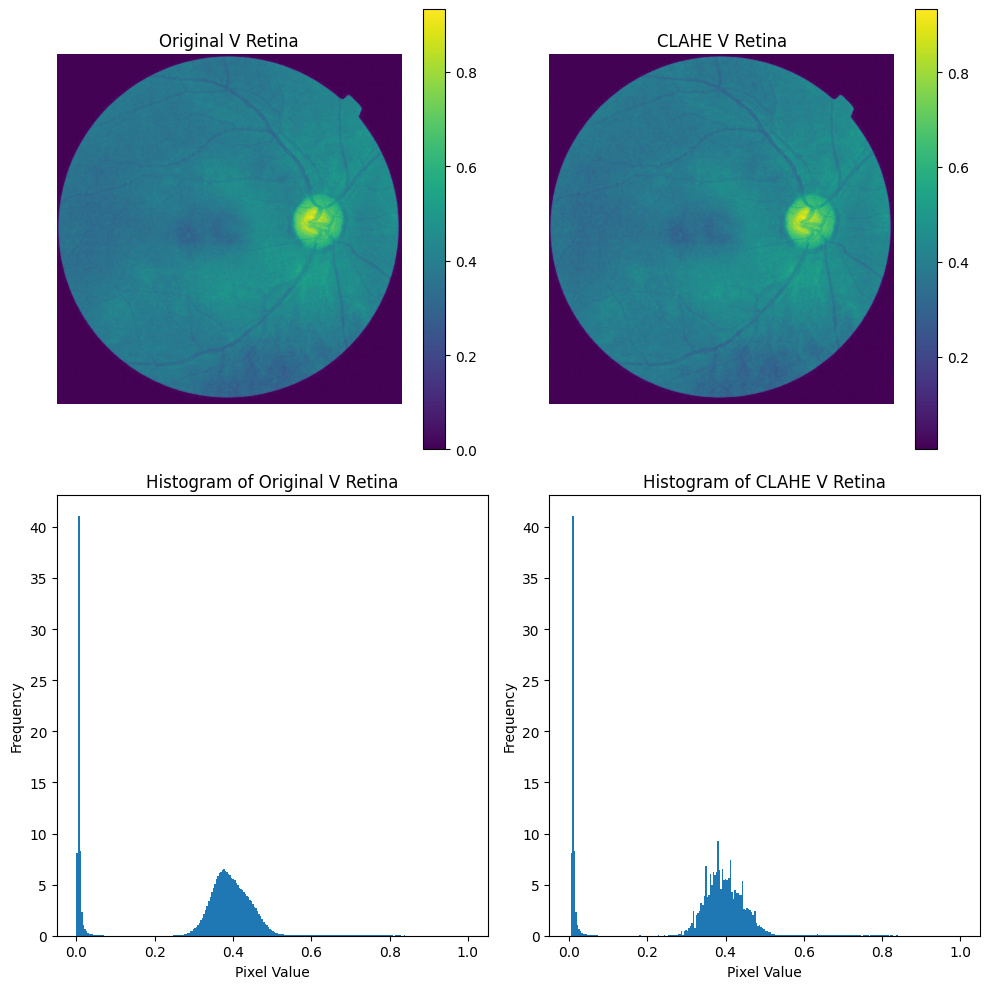

Part (d) - Histogram Matching


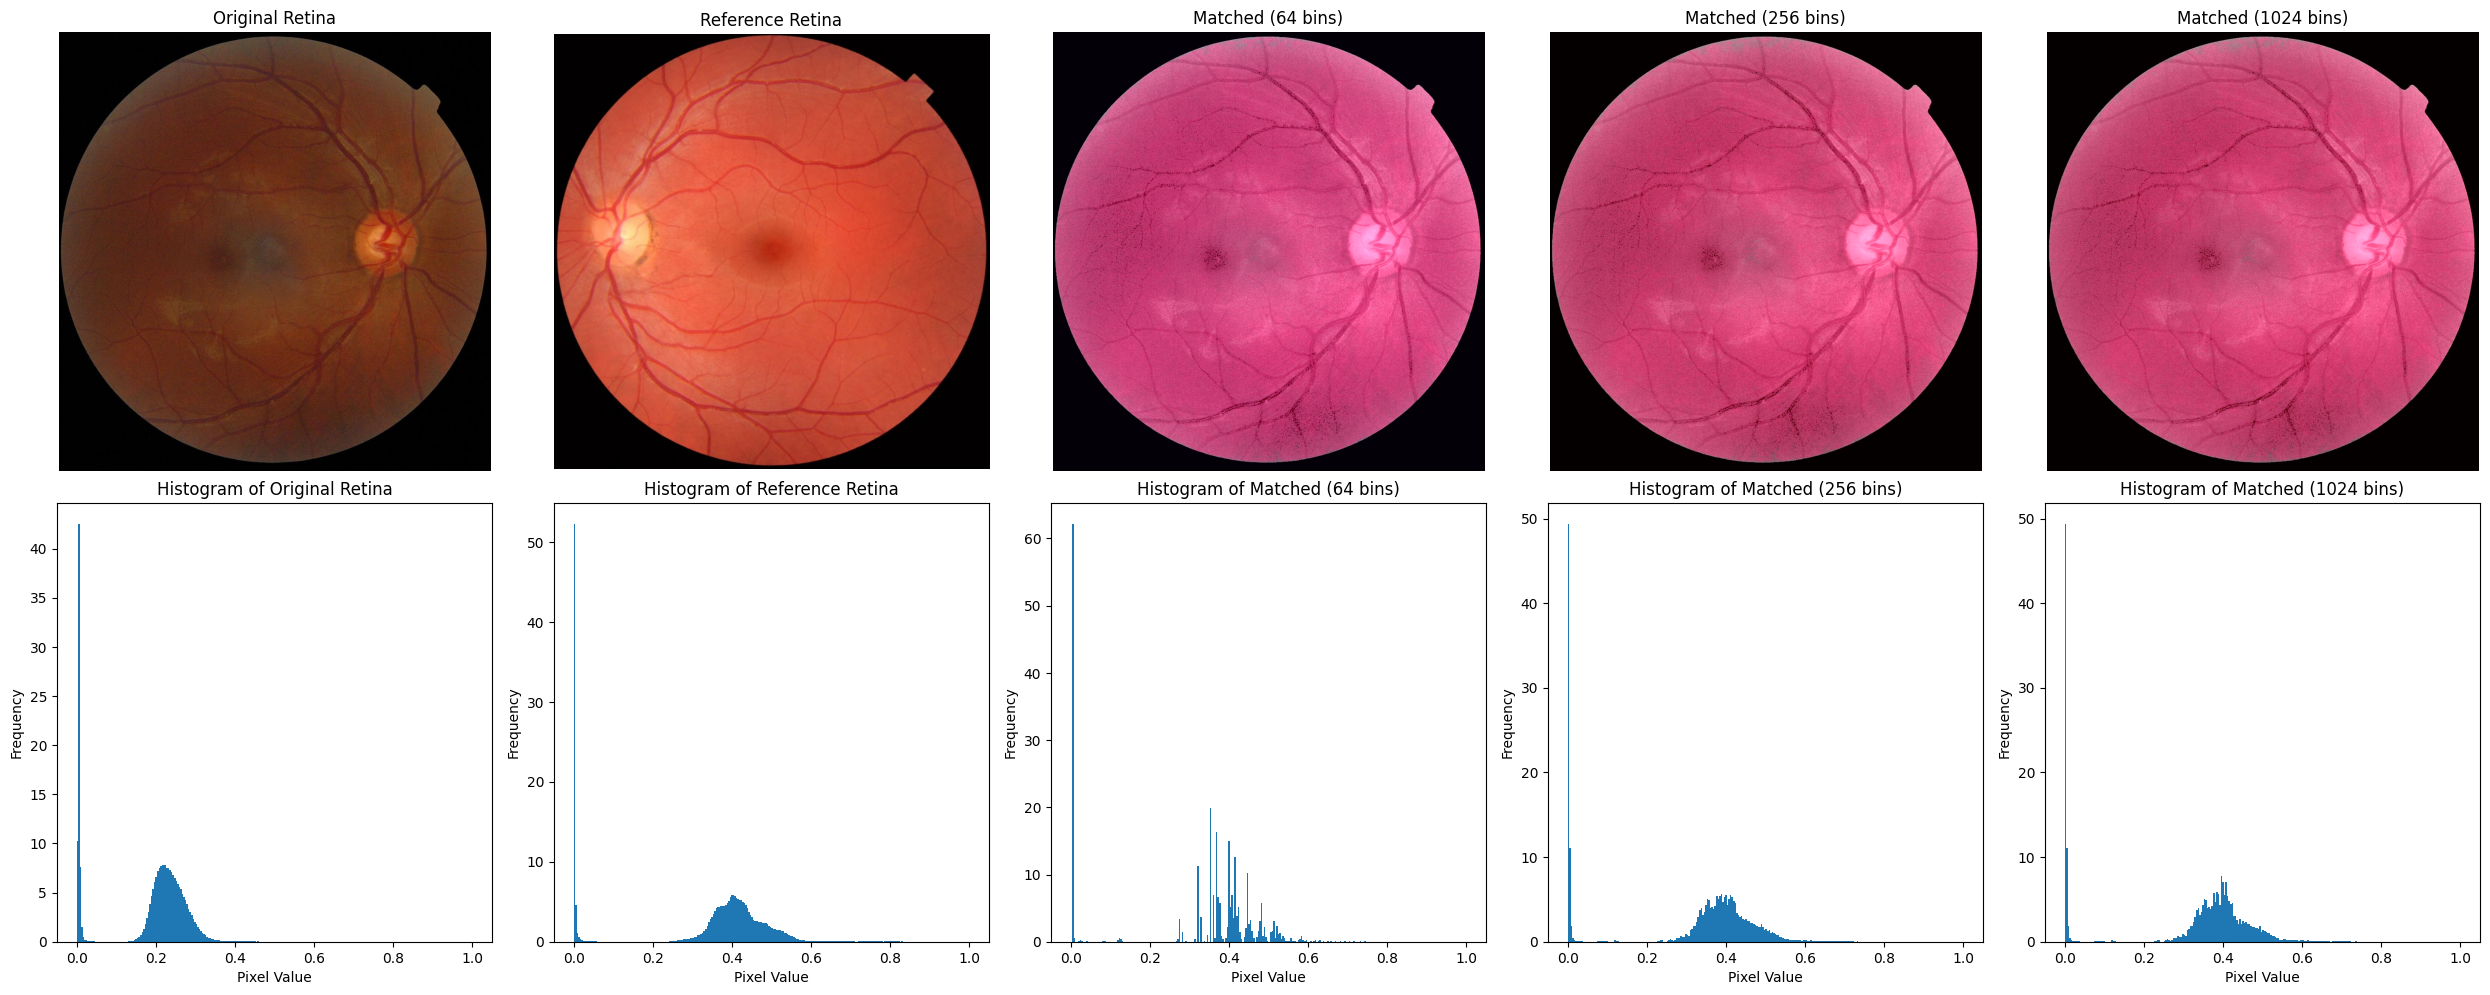

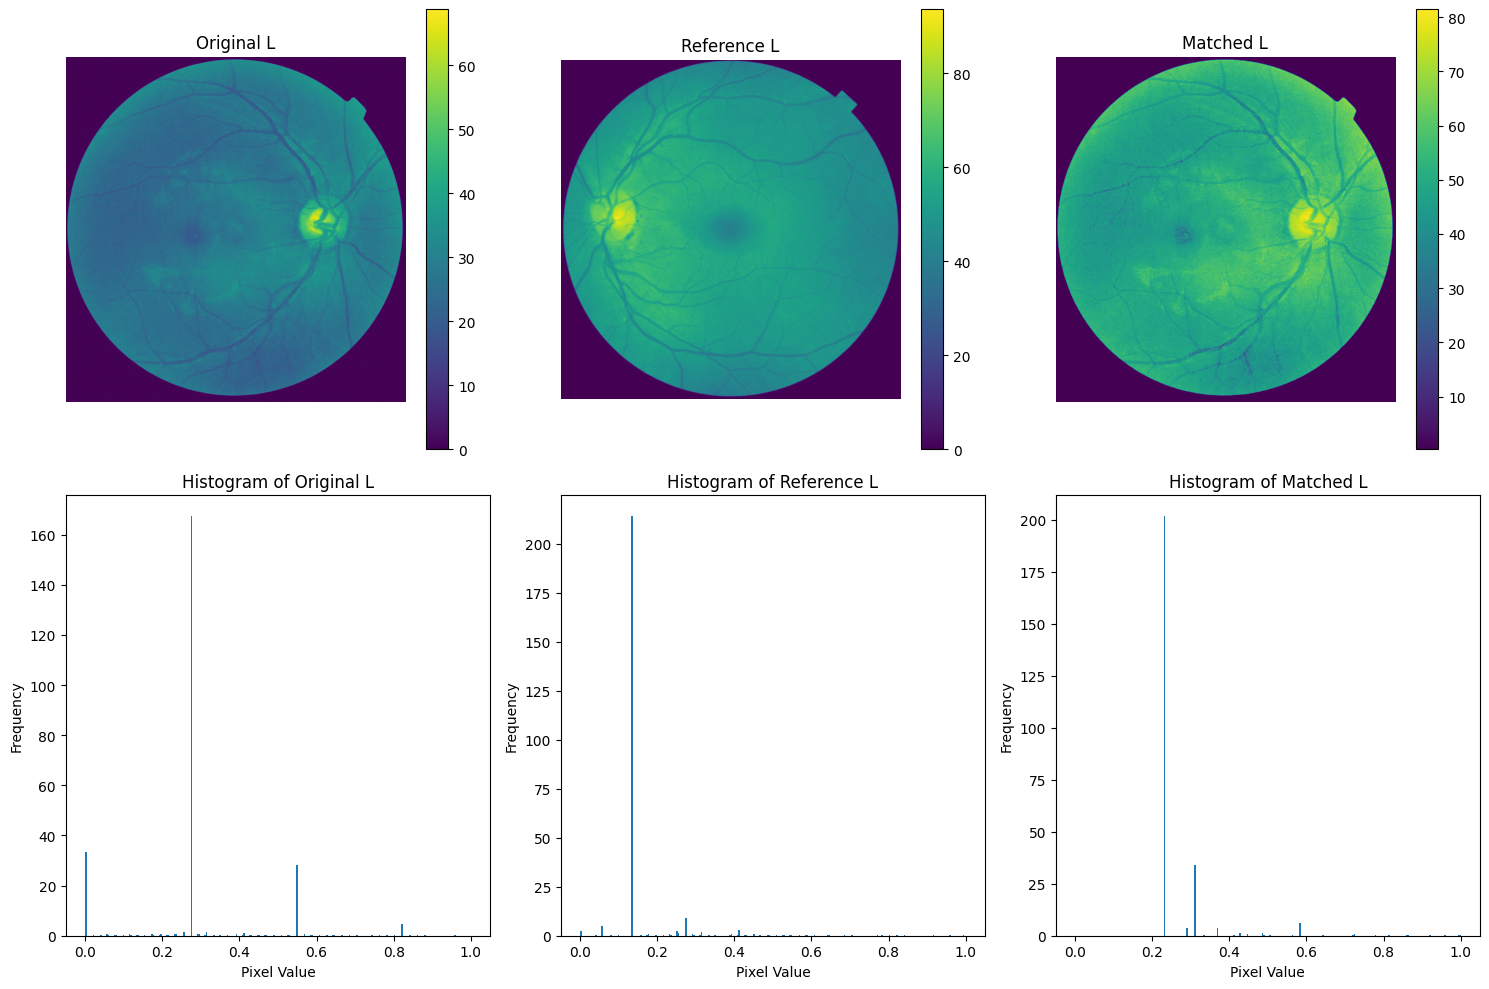

C:\Users\prana\anaconda3\envs\tf-gpu\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


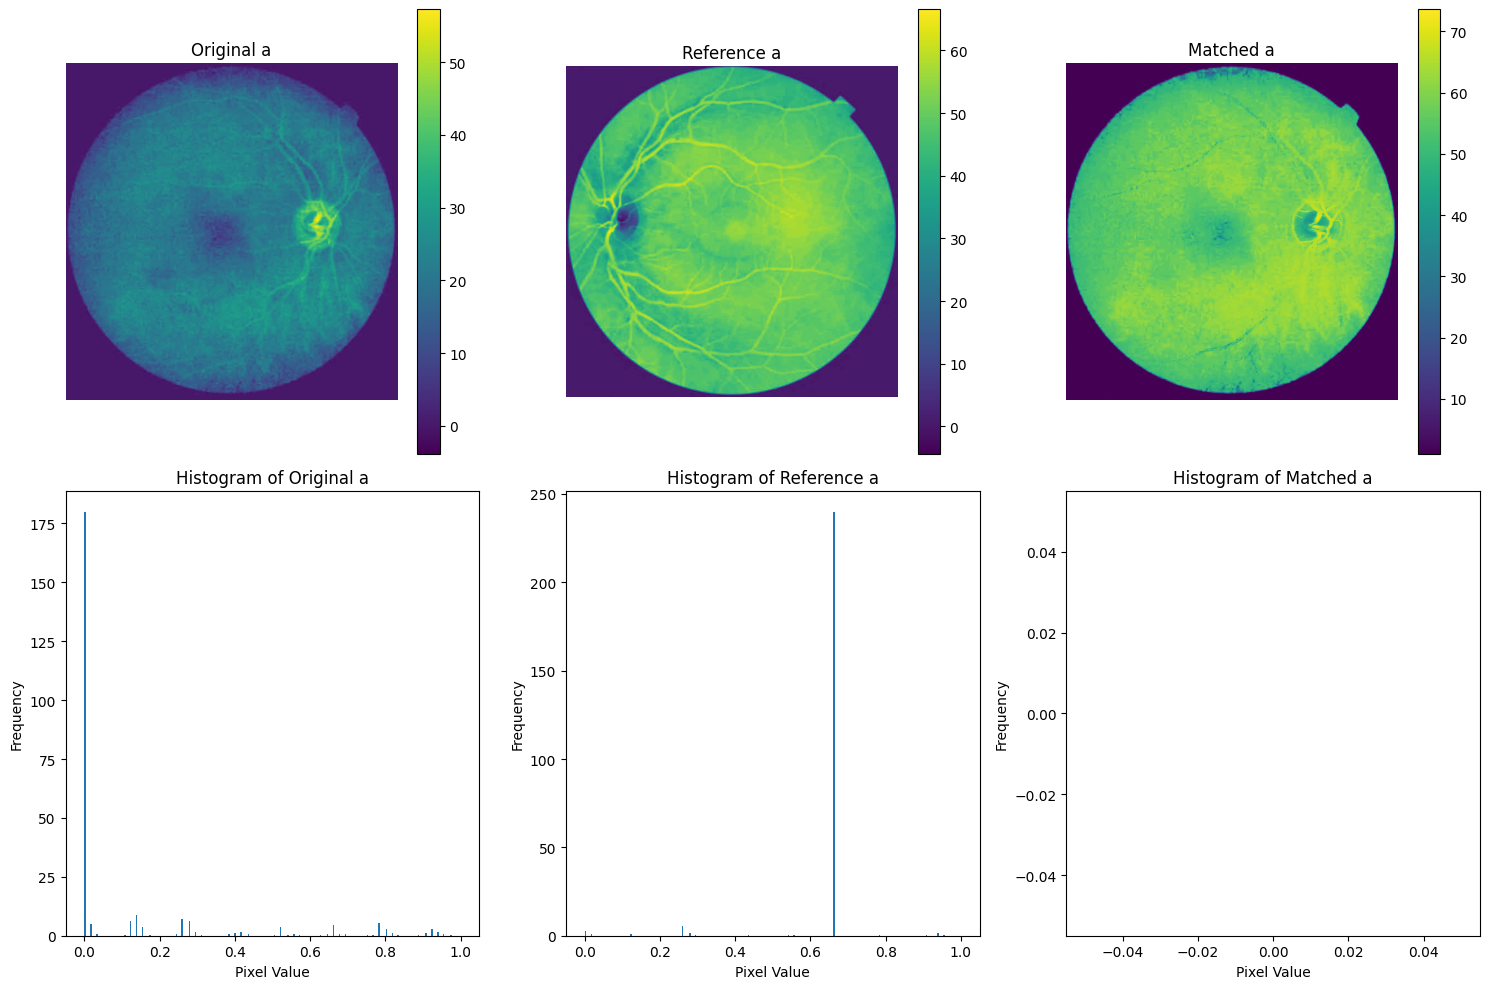

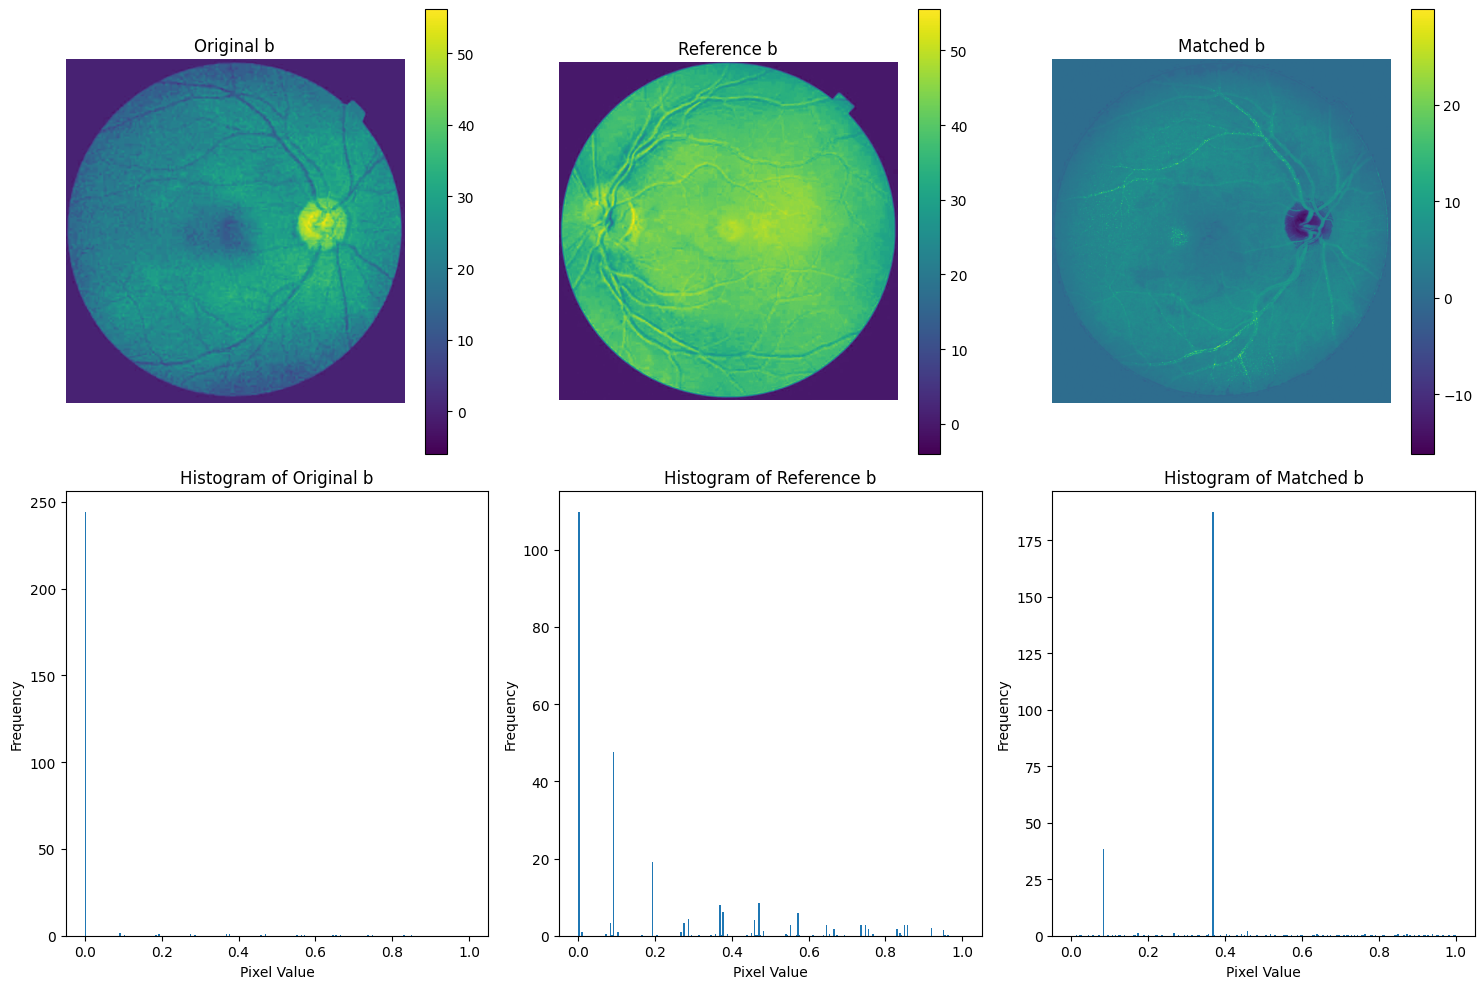

All processing complete. Results saved in the output directory.


In [11]:
from utils_copy1 import plot_images
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, img_as_float
import os
from LinearContrastStretch import LinearContrastStretch
from HistogramEqualization import HistogramEqualization
from CLAHE import CLAHE
from HistogramMatching import HistogramMatching


print("Part (a) - Linear Contrast Stretching")
leh_img = io.imread(r'C:\Users\prana\Downloads\CS663\Assignment1\Question3\data\hist\leh.png')
stretcher = LinearContrastStretch()
leh_stretched = stretcher.process(leh_img)

hsv_orig = color.rgb2hsv(img_as_float(leh_img))
hsv_stretched = color.rgb2hsv(leh_stretched)

plot_images([leh_img, leh_stretched, hsv_orig[:,:,2], hsv_stretched[:,:,2]],
           ['Original Image', 'Contrast Stretched', 'Original V Channel', 'Stretched V Channel'],
           cmap='viridis', filename='output/part_a_result.png')

# Part (b) - Histogram Equalization
print("Part (b) - Histogram Equalization")
equalizer = HistogramEqualization()
leh_he = equalizer.process(leh_img)
hsv_he = color.rgb2hsv(leh_he)

plot_images([leh_img, leh_he, hsv_orig[:,:,2], hsv_he[:,:,2]],
           ['Original Image', 'Histogram Equalized', 'Original V Channel', 'Equalized V Channel'],
           cmap='viridis', filename='output/part_b_result.png')

# Part (c) - CLAHE
print("Part (c) - CLAHE")
canyon_img = io.imread(r'C:\Users\prana\Downloads\CS663\Assignment1\Question3\data\hist\canyon.png')
retina_img = io.imread(r'C:\Users\prana\Downloads\CS663\Assignment1\Question3\data\hist\retina.png')

clahe = CLAHE()
canyon_clahe_tuned = clahe.process(canyon_img, nbins=256, tile_size=128, clip_limit=0.02)
canyon_clahe_large = clahe.process(canyon_img, nbins=256, tile_size=256, clip_limit=0.02)
canyon_clahe_small = clahe.process(canyon_img, nbins=256, tile_size=64, clip_limit=0.02)
canyon_clahe_half_clip = clahe.process(canyon_img, nbins=256, tile_size=128, clip_limit=0.01)

hsv_canyon = color.rgb2hsv(img_as_float(canyon_img))
hsv_tuned = color.rgb2hsv(canyon_clahe_tuned)
hsv_large = color.rgb2hsv(canyon_clahe_large)
hsv_small = color.rgb2hsv(canyon_clahe_small)
hsv_half = color.rgb2hsv(canyon_clahe_half_clip)

plot_images([canyon_img, canyon_clahe_tuned, canyon_clahe_large, canyon_clahe_small, canyon_clahe_half_clip],
           ['Original Canyon', 'CLAHE Tuned (ts=128, cl=0.02)', 'CLAHE Large Tile (ts=256)',
            'CLAHE Small Tile (ts=64)', 'CLAHE Half Clip (cl=0.01)'],
           filename='output/part_c_canyon_results.png')

plot_images([hsv_canyon[:,:,2], hsv_tuned[:,:,2], hsv_large[:,:,2], hsv_small[:,:,2], hsv_half[:,:,2]],
           ['Original V', 'Tuned V', 'Large Tile V', 'Small Tile V', 'Half Clip V'],
           cmap='viridis', filename='output/part_c_canyon_vchannel.png')

retina_clahe = clahe.process(retina_img, nbins=256, tile_size=64, clip_limit=0.03)
hsv_retina = color.rgb2hsv(img_as_float(retina_img))
hsv_retina_clahe = color.rgb2hsv(retina_clahe)

plot_images([retina_img, retina_clahe],
           ['Original Retina', 'CLAHE Retina'],
           filename='output/part_c_retina_results.png')

plot_images([hsv_retina[:,:,2], hsv_retina_clahe[:,:,2]],
           ['Original V Retina', 'CLAHE V Retina'],
           cmap='viridis', filename='output/part_c_retina_vchannel.png')

# Part (d) - Histogram Matching
print("Part (d) - Histogram Matching")
retina_img_d = io.imread(r'C:\Users\prana\Downloads\CS663\Assignment1\Question3\data\hist\retina.png')
retina_ref_img = io.imread(r'C:\Users\prana\Downloads\CS663\Assignment1\Question3\data\hist\retinaRef.png')

matcher = HistogramMatching()
retina_matched_64 = matcher.process(retina_img_d, retina_ref_img, nbins=64)
retina_matched_256 = matcher.process(retina_img_d, retina_ref_img, nbins=256)
retina_matched_1024 = matcher.process(retina_img_d, retina_ref_img, nbins=1024)

plot_images([retina_img_d, retina_ref_img, retina_matched_64, retina_matched_256, retina_matched_1024],
           ['Original Retina', 'Reference Retina', 'Matched (64 bins)', 'Matched (256 bins)', 'Matched (1024 bins)'],
           filename='output/part_d_results.png')

lab_orig = color.rgb2lab(img_as_float(retina_img_d))
lab_ref = color.rgb2lab(img_as_float(retina_ref_img))
lab_matched = color.rgb2lab(img_as_float(retina_matched_256))

plot_images([lab_orig[:,:,0], lab_ref[:,:,0], lab_matched[:,:,0]],
           ['Original L', 'Reference L', 'Matched L'],
           cmap='viridis', filename='output/part_d_luminance.png')

plot_images([lab_orig[:,:,1], lab_ref[:,:,1], lab_matched[:,:,1]],
           ['Original a', 'Reference a', 'Matched a'],
           cmap='viridis', filename='output/part_d_chroma_a.png')

plot_images([lab_orig[:,:,2], lab_ref[:,:,2], lab_matched[:,:,2]],
           ['Original b', 'Reference b', 'Matched b'],
           cmap='viridis', filename='output/part_d_chroma_b.png')

print("All processing complete. Results saved in the output directory.")